<h1> Analysis of UCR_PART where shooting occured using decison tree and random forest</h1>

In [1]:
import pandas as pd
df=pd.read_csv('C:\\Users\\Dell\\Desktop\\crime.csv',sep=',', engine='python')

In [2]:
df=df.dropna()
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1052,I182078893,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,416,Y,29-09-2018 21:12,2018,9,Saturday,21,Part One,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1053,I182078893,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,C11,416,Y,29-09-2018 21:12,2018,9,Saturday,21,Part Two,WASHINGTON ST,42.281647,-71.071118,"(42.28164735, -71.07111848)"
1074,I182078872,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,330,Y,29-09-2018 19:21,2018,9,Saturday,19,Part One,SEAVER ST,42.304554,-71.082954,"(42.30455372, -71.08295366)"
1907,I182077958,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,428,Y,26-09-2018 20:20,2018,9,Wednesday,20,Part One,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"
1908,I182077958,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B3,428,Y,26-09-2018 20:20,2018,9,Wednesday,20,Part Two,MORTON ST,42.283746,-71.089382,"(42.28374593, -71.08938232)"


In [3]:
df_independent = df[['Lat', 'Long' ,'HOUR']]
df_dependent=df[['UCR_PART']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.30)

In [110]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[145  31  21]
 [ 31   3   6]
 [ 45   8  12]]
0.5298013245033113
              precision    recall  f1-score   support

    Part One       0.66      0.74      0.69       197
  Part Three       0.07      0.07      0.07        40
    Part Two       0.31      0.18      0.23        65

    accuracy                           0.53       302
   macro avg       0.35      0.33      0.33       302
weighted avg       0.50      0.53      0.51       302



USING PCA

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.30)

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[151  25  13]
 [ 47   5   7]
 [ 39   6   9]]
0.5463576158940397
              precision    recall  f1-score   support

    Part One       0.64      0.80      0.71       189
  Part Three       0.14      0.08      0.11        59
    Part Two       0.31      0.17      0.22        54

    accuracy                           0.55       302
   macro avg       0.36      0.35      0.34       302
weighted avg       0.48      0.55      0.50       302



<h1> Decision tree</h1>


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.30)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtreesimple = DecisionTreeClassifier()
dtreesimple.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
predictions = dtreesimple.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[150  28  21]
 [ 41   4   4]
 [ 46   4   4]]
0.5231788079470199
              precision    recall  f1-score   support

    Part One       0.63      0.75      0.69       199
  Part Three       0.11      0.08      0.09        49
    Part Two       0.14      0.07      0.10        54

    accuracy                           0.52       302
   macro avg       0.29      0.30      0.29       302
weighted avg       0.46      0.52      0.49       302



<h1> WITH PCA</h1>

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.30)

In [96]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [97]:
from sklearn.tree import DecisionTreeClassifier
dtreesimple = DecisionTreeClassifier()
dtreesimple.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predictions = dtreesimple.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[149  26  21]
 [ 45   6   4]
 [ 43   4   4]]
0.5264900662251656
              precision    recall  f1-score   support

    Part One       0.63      0.76      0.69       196
  Part Three       0.17      0.11      0.13        55
    Part Two       0.14      0.08      0.10        51

    accuracy                           0.53       302
   macro avg       0.31      0.32      0.31       302
weighted avg       0.46      0.53      0.49       302



In [6]:
df.describe(include=['object'])

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,327820,327820,327820,326046,327820,1055,327820,327820,327727,316843,327820
unique,290156,67,244,12,880,1,238675,7,4,4684,18255
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,01-06-2017 00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,38134,19360,51288,20920,1055,29,49758,162929,14590,20632


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtreesimple = DecisionTreeClassifier(max_depth=4)
dtreesimple.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
predictions = dtreesimple.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Part One       0.65      0.97      0.78       195
  Part Three       0.20      0.02      0.04        51
    Part Two       0.33      0.04      0.06        56

    accuracy                           0.64       302
   macro avg       0.39      0.34      0.29       302
weighted avg       0.51      0.64      0.52       302



In [44]:
print(confusion_matrix(y_test,predictions))

[[189   2   4]
 [ 50   1   0]
 [ 52   2   2]]


In [45]:
#!pip install pydot
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_independent.columns)
features

['Lat', 'Long', 'HOUR']

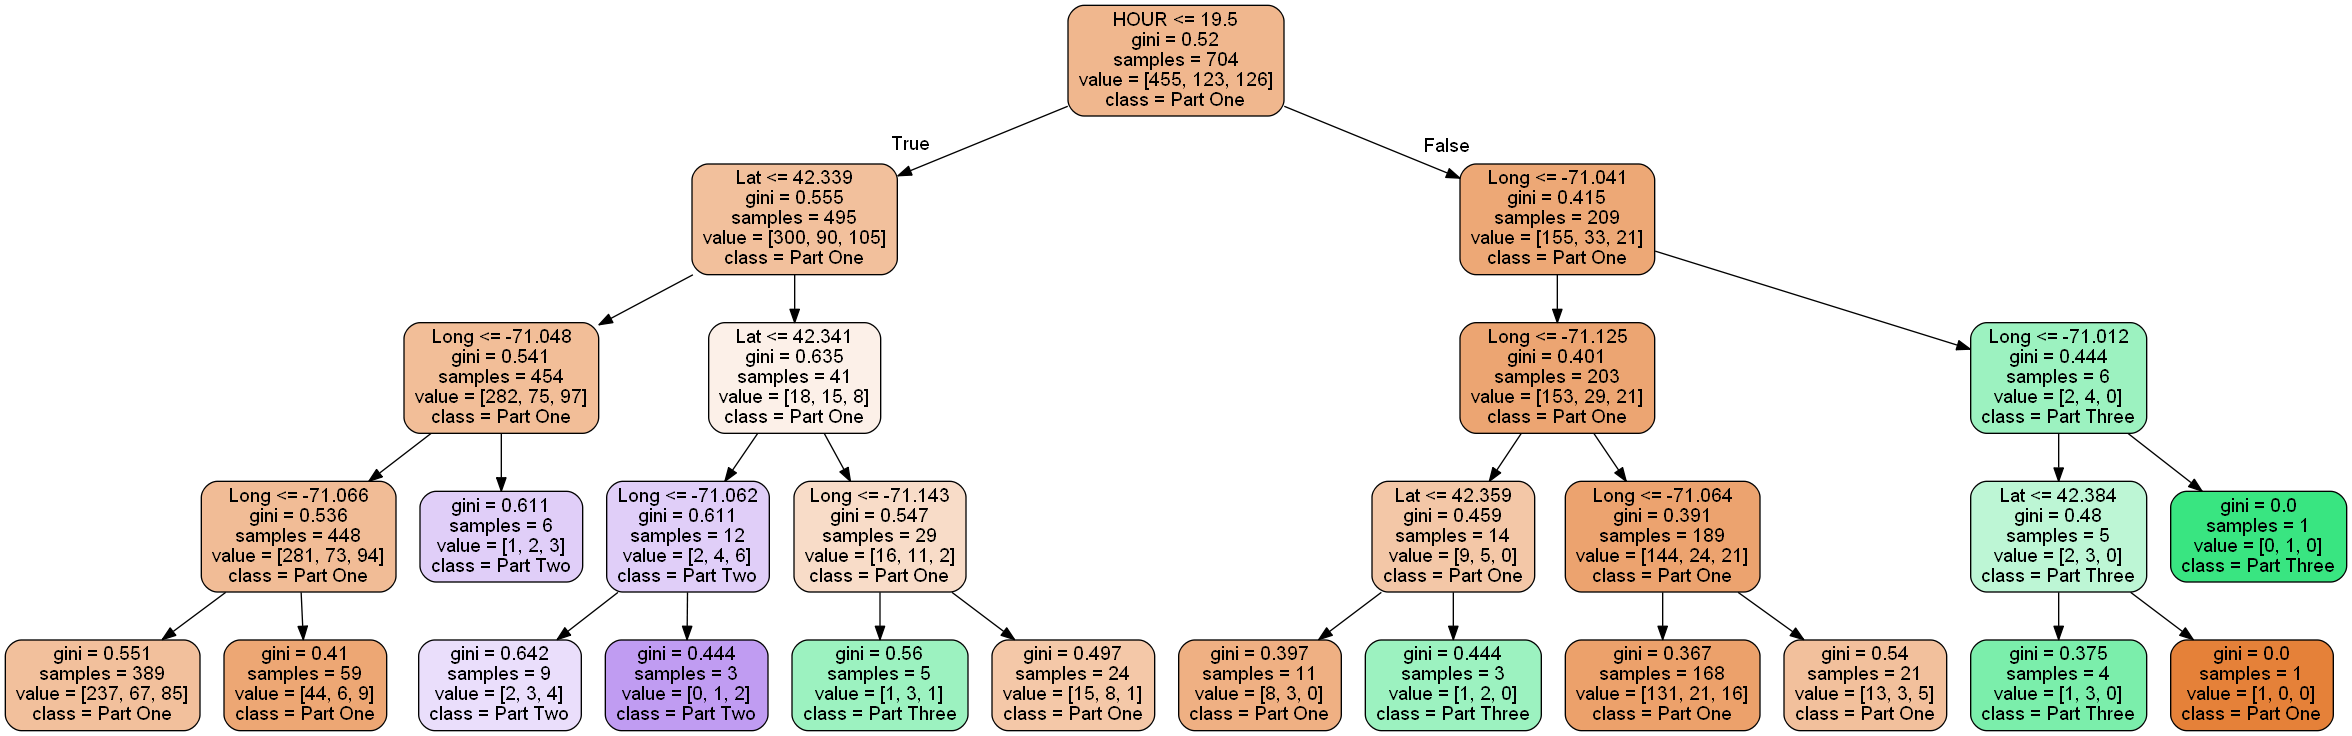

In [46]:
dot_data = StringIO()  
export_graphviz(dtreesimple, out_file=dot_data,feature_names=features,filled=True,rounded=True,class_names =dtreesimple.classes_)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  